## 线性分类
* 不能使用现成机器学习库（比如sklearn, tensorflow, caffe, pytorch等），用numpy实现线性分类
* 文件x_train.npy和t_train.npy给出训练数据和真值
* 提交对于文件test所给数据的预测结果，以numpy数组的形式存储为文件t_test.npy
* 以文本文件的形式提交分类平面的表达式

数据演示如下：

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train = np.load('x_train.npy')
y_train = np.load('t_train.npy')
print(x_train.shape)
print(y_train.shape)
# plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
# plt.xlim([-4, 6])
# plt.ylim([-4, 6])

(75, 2)
(75,)


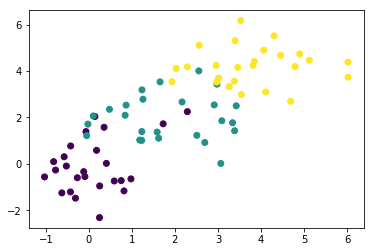

In [4]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [5]:
x_train_mean = np.mean(x_train,axis=0)
print('样本特征的均值',x_train_mean)
x_train -= x_train_mean
x_train_std = np.std(x_train,axis=0)
print('样本特征的标准差',x_train_std)
x_train /= x_train_std
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])

样本特征的均值 [1.89985978 2.03252308]
样本特征的标准差 [1.79901635 2.00216829]


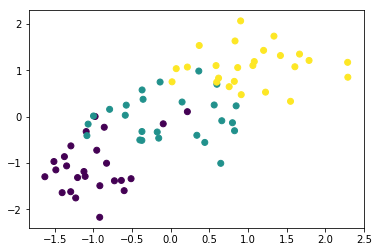

In [6]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [6]:
'''我一开始是用交叉熵损失来训练，效果不好 81.33% 对应61/75'''
from cs231n.classifiers.softmax import softmax_loss_vectorized
from cs231n.classifiers import Softmax
results = {}
best_acc = -1
best_softmax = None

num_tune = 10
lr_tune=np.logspace(-6,-4.5,num_tune)
reg_tune=np.logspace(-4,4,num_tune)
np.random.shuffle(reg_tune)
tune=[]
for lr in lr_tune:
    for reg in reg_tune:
        tune.append((lr,reg))
for lr,reg in tune:
    softmax = Softmax()
    loss_hist = softmax.train(x_train, y_train, learning_rate=lr, reg=reg,
                              num_iters=1000, verbose=True)
    y_train_pred = softmax.predict(x_train)
    train_acc=np.mean(y_train == y_train_pred)
    results[(lr,reg)]=train_acc
    if train_acc>best_acc:
        best_acc=train_acc
        best_softmax=softmax
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f' % (
                lr, reg, train_accuracy))
    
print('best training accuracy achieved: %f' % best_acc)

iteration 0 / 1000: loss 1.099112
iteration 100 / 1000: loss 1.098854
iteration 200 / 1000: loss 1.098901
iteration 300 / 1000: loss 1.098984
iteration 400 / 1000: loss 1.098765
iteration 500 / 1000: loss 1.098713
iteration 600 / 1000: loss 1.098742
iteration 700 / 1000: loss 1.098773
iteration 800 / 1000: loss 1.098655
iteration 900 / 1000: loss 1.098610
iteration 0 / 1000: loss 1.145957
iteration 100 / 1000: loss 1.099428
iteration 200 / 1000: loss 1.098613
iteration 300 / 1000: loss 1.098603
iteration 400 / 1000: loss 1.098600
iteration 500 / 1000: loss 1.098600
iteration 600 / 1000: loss 1.098601
iteration 700 / 1000: loss 1.098598
iteration 800 / 1000: loss 1.098601
iteration 900 / 1000: loss 1.098600
iteration 0 / 1000: loss 1.101254
iteration 100 / 1000: loss 1.100935
iteration 200 / 1000: loss 1.100643
iteration 300 / 1000: loss 1.100584
iteration 400 / 1000: loss 1.100326
iteration 500 / 1000: loss 1.100235
iteration 600 / 1000: loss 1.100147
iteration 700 / 1000: loss 1.09978

iteration 300 / 1000: loss 1.098508
iteration 400 / 1000: loss 1.098263
iteration 500 / 1000: loss 1.098150
iteration 600 / 1000: loss 1.098164
iteration 700 / 1000: loss 1.097933
iteration 800 / 1000: loss 1.098164
iteration 900 / 1000: loss 1.097938
iteration 0 / 1000: loss 1.099088
iteration 100 / 1000: loss 1.099176
iteration 200 / 1000: loss 1.098838
iteration 300 / 1000: loss 1.098726
iteration 400 / 1000: loss 1.098761
iteration 500 / 1000: loss 1.098614
iteration 600 / 1000: loss 1.098475
iteration 700 / 1000: loss 1.098397
iteration 800 / 1000: loss 1.098329
iteration 900 / 1000: loss 1.098274
iteration 0 / 1000: loss 1.098662
iteration 100 / 1000: loss 1.098521
iteration 200 / 1000: loss 1.098384
iteration 300 / 1000: loss 1.098272
iteration 400 / 1000: loss 1.098160
iteration 500 / 1000: loss 1.098113
iteration 600 / 1000: loss 1.097966
iteration 700 / 1000: loss 1.097972
iteration 800 / 1000: loss 1.097984
iteration 900 / 1000: loss 1.097830
iteration 0 / 1000: loss 1.09852

iteration 500 / 1000: loss 1.097466
iteration 600 / 1000: loss 1.097123
iteration 700 / 1000: loss 1.096962
iteration 800 / 1000: loss 1.096410
iteration 900 / 1000: loss 1.096384
iteration 0 / 1000: loss 1.122683
iteration 100 / 1000: loss 1.100614
iteration 200 / 1000: loss 1.098712
iteration 300 / 1000: loss 1.098533
iteration 400 / 1000: loss 1.098528
iteration 500 / 1000: loss 1.098515
iteration 600 / 1000: loss 1.098502
iteration 700 / 1000: loss 1.098525
iteration 800 / 1000: loss 1.098515
iteration 900 / 1000: loss 1.098506
iteration 0 / 1000: loss 1.098453
iteration 100 / 1000: loss 1.098534
iteration 200 / 1000: loss 1.098136
iteration 300 / 1000: loss 1.097967
iteration 400 / 1000: loss 1.097540
iteration 500 / 1000: loss 1.097585
iteration 600 / 1000: loss 1.097372
iteration 700 / 1000: loss 1.096948
iteration 800 / 1000: loss 1.096858
iteration 900 / 1000: loss 1.097317
iteration 0 / 1000: loss 1.099405
iteration 100 / 1000: loss 1.099211
iteration 200 / 1000: loss 1.09892

iteration 500 / 1000: loss 1.095815
iteration 600 / 1000: loss 1.095445
iteration 700 / 1000: loss 1.094918
iteration 800 / 1000: loss 1.094460
iteration 900 / 1000: loss 1.094138
iteration 0 / 1000: loss 1.099098
iteration 100 / 1000: loss 1.098311
iteration 200 / 1000: loss 1.097538
iteration 300 / 1000: loss 1.096835
iteration 400 / 1000: loss 1.096258
iteration 500 / 1000: loss 1.095608
iteration 600 / 1000: loss 1.094891
iteration 700 / 1000: loss 1.094096
iteration 800 / 1000: loss 1.093817
iteration 900 / 1000: loss 1.092485
iteration 0 / 1000: loss 1.213154
iteration 100 / 1000: loss 1.098599
iteration 200 / 1000: loss 1.098600
iteration 300 / 1000: loss 1.098602
iteration 400 / 1000: loss 1.098601
iteration 500 / 1000: loss 1.098599
iteration 600 / 1000: loss 1.098598
iteration 700 / 1000: loss 1.098600
iteration 800 / 1000: loss 1.098601
iteration 900 / 1000: loss 1.098599
iteration 0 / 1000: loss 1.100323
iteration 100 / 1000: loss 1.098811
iteration 200 / 1000: loss 1.09829

iteration 600 / 1000: loss 1.097747
iteration 700 / 1000: loss 1.097799
iteration 800 / 1000: loss 1.097875
iteration 900 / 1000: loss 1.097892
iteration 0 / 1000: loss 1.097702
iteration 100 / 1000: loss 1.096275
iteration 200 / 1000: loss 1.095131
iteration 300 / 1000: loss 1.093326
iteration 400 / 1000: loss 1.091859
iteration 500 / 1000: loss 1.090553
iteration 600 / 1000: loss 1.089384
iteration 700 / 1000: loss 1.087749
iteration 800 / 1000: loss 1.087682
iteration 900 / 1000: loss 1.086340
iteration 0 / 1000: loss 1.099676
iteration 100 / 1000: loss 1.097834
iteration 200 / 1000: loss 1.096808
iteration 300 / 1000: loss 1.094541
iteration 400 / 1000: loss 1.092868
iteration 500 / 1000: loss 1.091790
iteration 600 / 1000: loss 1.090154
iteration 700 / 1000: loss 1.088702
iteration 800 / 1000: loss 1.087795
iteration 900 / 1000: loss 1.085906
iteration 0 / 1000: loss 1.097937
iteration 100 / 1000: loss 1.096295
iteration 200 / 1000: loss 1.095409
iteration 300 / 1000: loss 1.09374

In [7]:
'''后来改用svm loss之后，效果变好了 90.667% 对应68/75'''
from cs231n.classifiers import LinearSVM
results = {}
best_acc = -1
best_softmax = None

num_tune = 10
lr_tune=np.logspace(-3.5,1,num_tune)
reg_tune=np.logspace(-4,1,num_tune)
np.random.shuffle(reg_tune)
tune=[]
for lr in lr_tune:
    for reg in reg_tune:
        tune.append((lr,reg))
for lr,reg in tune:
    svm = LinearSVM()
    loss_hist = svm.train(x_train, y_train, learning_rate=lr, reg=reg,
                              num_iters=3000, verbose=True)
    y_train_pred = svm.predict(x_train)
    train_acc=np.mean(y_train == y_train_pred)
    results[(lr,reg)]=train_acc
    if train_acc>best_acc:
        best_acc=train_acc
        best_svm=svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f' % (
                lr, reg, train_accuracy))
    
print('best training accuracy achieved: %f' % best_acc)

iteration 0 / 3000: loss 1.999847
iteration 100 / 3000: loss 1.848978
iteration 200 / 3000: loss 1.741000
iteration 300 / 3000: loss 1.615218
iteration 400 / 3000: loss 1.460256
iteration 500 / 3000: loss 1.260956
iteration 600 / 3000: loss 1.194274
iteration 700 / 3000: loss 1.206058
iteration 800 / 3000: loss 1.177714
iteration 900 / 3000: loss 1.053712
iteration 1000 / 3000: loss 1.057704
iteration 1100 / 3000: loss 1.077219
iteration 1200 / 3000: loss 0.908143
iteration 1300 / 3000: loss 1.004012
iteration 1400 / 3000: loss 0.920516
iteration 1500 / 3000: loss 0.973675
iteration 1600 / 3000: loss 0.959617
iteration 1700 / 3000: loss 0.830526
iteration 1800 / 3000: loss 0.960347
iteration 1900 / 3000: loss 1.008980
iteration 2000 / 3000: loss 0.907089
iteration 2100 / 3000: loss 0.882457
iteration 2200 / 3000: loss 0.922509
iteration 2300 / 3000: loss 0.911734
iteration 2400 / 3000: loss 0.836767
iteration 2500 / 3000: loss 0.919676
iteration 2600 / 3000: loss 0.880035
iteration 270

iteration 2500 / 3000: loss 0.796643
iteration 2600 / 3000: loss 0.874450
iteration 2700 / 3000: loss 0.805793
iteration 2800 / 3000: loss 0.842484
iteration 2900 / 3000: loss 0.810236
iteration 0 / 3000: loss 1.997831
iteration 100 / 3000: loss 1.855658
iteration 200 / 3000: loss 1.747683
iteration 300 / 3000: loss 1.658759
iteration 400 / 3000: loss 1.585545
iteration 500 / 3000: loss 1.485200
iteration 600 / 3000: loss 1.398788
iteration 700 / 3000: loss 1.302145
iteration 800 / 3000: loss 1.270409
iteration 900 / 3000: loss 1.255160
iteration 1000 / 3000: loss 1.291536
iteration 1100 / 3000: loss 1.326216
iteration 1200 / 3000: loss 1.238189
iteration 1300 / 3000: loss 1.345112
iteration 1400 / 3000: loss 1.214089
iteration 1500 / 3000: loss 1.194169
iteration 1600 / 3000: loss 1.279610
iteration 1700 / 3000: loss 1.263898
iteration 1800 / 3000: loss 1.288992
iteration 1900 / 3000: loss 1.236103
iteration 2000 / 3000: loss 1.258642
iteration 2100 / 3000: loss 1.320852
iteration 220

iteration 2200 / 3000: loss 0.976626
iteration 2300 / 3000: loss 0.997318
iteration 2400 / 3000: loss 1.007989
iteration 2500 / 3000: loss 0.957201
iteration 2600 / 3000: loss 0.944737
iteration 2700 / 3000: loss 0.944626
iteration 2800 / 3000: loss 0.892907
iteration 2900 / 3000: loss 1.003302
iteration 0 / 3000: loss 1.999468
iteration 100 / 3000: loss 1.623316
iteration 200 / 3000: loss 1.279029
iteration 300 / 3000: loss 1.045217
iteration 400 / 3000: loss 0.976458
iteration 500 / 3000: loss 0.877032
iteration 600 / 3000: loss 0.905183
iteration 700 / 3000: loss 0.870261
iteration 800 / 3000: loss 0.833855
iteration 900 / 3000: loss 0.802085
iteration 1000 / 3000: loss 0.667809
iteration 1100 / 3000: loss 0.721018
iteration 1200 / 3000: loss 0.768673
iteration 1300 / 3000: loss 0.666914
iteration 1400 / 3000: loss 0.782261
iteration 1500 / 3000: loss 0.649320
iteration 1600 / 3000: loss 0.675332
iteration 1700 / 3000: loss 0.707975
iteration 1800 / 3000: loss 0.598808
iteration 190

iteration 2000 / 3000: loss 0.445178
iteration 2100 / 3000: loss 0.415080
iteration 2200 / 3000: loss 0.503988
iteration 2300 / 3000: loss 0.453192
iteration 2400 / 3000: loss 0.454013
iteration 2500 / 3000: loss 0.411923
iteration 2600 / 3000: loss 0.446916
iteration 2700 / 3000: loss 0.502373
iteration 2800 / 3000: loss 0.429180
iteration 2900 / 3000: loss 0.378651
iteration 0 / 3000: loss 1.998185
iteration 100 / 3000: loss 1.020131
iteration 200 / 3000: loss 0.875767
iteration 300 / 3000: loss 0.930353
iteration 400 / 3000: loss 0.717078
iteration 500 / 3000: loss 0.690790
iteration 600 / 3000: loss 0.530444
iteration 700 / 3000: loss 0.646134
iteration 800 / 3000: loss 0.603589
iteration 900 / 3000: loss 0.538969
iteration 1000 / 3000: loss 0.602362
iteration 1100 / 3000: loss 0.543034
iteration 1200 / 3000: loss 0.550366
iteration 1300 / 3000: loss 0.641467
iteration 1400 / 3000: loss 0.505829
iteration 1500 / 3000: loss 0.496837
iteration 1600 / 3000: loss 0.541239
iteration 170

iteration 500 / 3000: loss 1.885015
iteration 600 / 3000: loss 1.870129
iteration 700 / 3000: loss 1.901141
iteration 800 / 3000: loss 1.889479
iteration 900 / 3000: loss 1.872412
iteration 1000 / 3000: loss 1.872424
iteration 1100 / 3000: loss 1.898959
iteration 1200 / 3000: loss 1.908114
iteration 1300 / 3000: loss 1.880660
iteration 1400 / 3000: loss 1.883187
iteration 1500 / 3000: loss 1.876400
iteration 1600 / 3000: loss 1.895952
iteration 1700 / 3000: loss 1.886227
iteration 1800 / 3000: loss 1.909172
iteration 1900 / 3000: loss 1.900707
iteration 2000 / 3000: loss 1.887034
iteration 2100 / 3000: loss 1.890002
iteration 2200 / 3000: loss 1.905174
iteration 2300 / 3000: loss 1.896165
iteration 2400 / 3000: loss 1.921919
iteration 2500 / 3000: loss 1.901780
iteration 2600 / 3000: loss 1.894431
iteration 2700 / 3000: loss 1.890739
iteration 2800 / 3000: loss 1.888537
iteration 2900 / 3000: loss 1.907179
iteration 0 / 3000: loss 1.996129
iteration 100 / 3000: loss 0.829589
iteration 

iteration 2000 / 3000: loss 1.234334
iteration 2100 / 3000: loss 1.290454
iteration 2200 / 3000: loss 1.291905
iteration 2300 / 3000: loss 1.284682
iteration 2400 / 3000: loss 1.231821
iteration 2500 / 3000: loss 1.319462
iteration 2600 / 3000: loss 1.372620
iteration 2700 / 3000: loss 1.300762
iteration 2800 / 3000: loss 1.232923
iteration 2900 / 3000: loss 1.259843
iteration 0 / 3000: loss 1.997178
iteration 100 / 3000: loss 1.585260
iteration 200 / 3000: loss 1.626387
iteration 300 / 3000: loss 1.569061
iteration 400 / 3000: loss 1.582764
iteration 500 / 3000: loss 1.642686
iteration 600 / 3000: loss 1.613599
iteration 700 / 3000: loss 1.599731
iteration 800 / 3000: loss 1.570910
iteration 900 / 3000: loss 1.593830
iteration 1000 / 3000: loss 1.596954
iteration 1100 / 3000: loss 1.642717
iteration 1200 / 3000: loss 1.705722
iteration 1300 / 3000: loss 1.666290
iteration 1400 / 3000: loss 1.555766
iteration 1500 / 3000: loss 1.661142
iteration 1600 / 3000: loss 1.617224
iteration 170

iteration 500 / 3000: loss 0.469891
iteration 600 / 3000: loss 0.427874
iteration 700 / 3000: loss 0.463941
iteration 800 / 3000: loss 0.367281
iteration 900 / 3000: loss 0.360969
iteration 1000 / 3000: loss 0.417704
iteration 1100 / 3000: loss 0.377226
iteration 1200 / 3000: loss 0.388736
iteration 1300 / 3000: loss 0.381411
iteration 1400 / 3000: loss 0.396870
iteration 1500 / 3000: loss 0.370994
iteration 1600 / 3000: loss 0.423194
iteration 1700 / 3000: loss 0.380470
iteration 1800 / 3000: loss 0.464363
iteration 1900 / 3000: loss 0.290396
iteration 2000 / 3000: loss 0.400222
iteration 2100 / 3000: loss 0.430422
iteration 2200 / 3000: loss 0.444449
iteration 2300 / 3000: loss 0.366367
iteration 2400 / 3000: loss 0.358915
iteration 2500 / 3000: loss 0.298643
iteration 2600 / 3000: loss 0.326992
iteration 2700 / 3000: loss 0.391186
iteration 2800 / 3000: loss 0.367613
iteration 2900 / 3000: loss 0.335617
iteration 0 / 3000: loss 1.999907
iteration 100 / 3000: loss 0.521305
iteration 

iteration 1800 / 3000: loss 0.331016
iteration 1900 / 3000: loss 0.314791
iteration 2000 / 3000: loss 0.293327
iteration 2100 / 3000: loss 0.275234
iteration 2200 / 3000: loss 0.240000
iteration 2300 / 3000: loss 0.243758
iteration 2400 / 3000: loss 0.222391
iteration 2500 / 3000: loss 0.273273
iteration 2600 / 3000: loss 0.193621
iteration 2700 / 3000: loss 0.358027
iteration 2800 / 3000: loss 0.180489
iteration 2900 / 3000: loss 0.211376
iteration 0 / 3000: loss 2.001293
iteration 100 / 3000: loss 0.511831
iteration 200 / 3000: loss 0.455312
iteration 300 / 3000: loss 0.465972
iteration 400 / 3000: loss 0.536988
iteration 500 / 3000: loss 0.530833
iteration 600 / 3000: loss 0.427313
iteration 700 / 3000: loss 0.564605
iteration 800 / 3000: loss 0.501606
iteration 900 / 3000: loss 0.493894
iteration 1000 / 3000: loss 0.457187
iteration 1100 / 3000: loss 0.532843
iteration 1200 / 3000: loss 0.503619
iteration 1300 / 3000: loss 0.448667
iteration 1400 / 3000: loss 0.466908
iteration 150

/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_svm.py:110: RuntimeWarning: overflow encountered in double_scalars
  loss=np.sum(dists_p)/N+reg*np.sum(W*W)
/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_svm.py:110: RuntimeWarning: overflow encountered in multiply
  loss=np.sum(dists_p)/N+reg*np.sum(W*W)
/home/masterbin-iiau/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_svm.py:104: RuntimeWarning: overflow encountered in subtract
  dists=score-correct_score+delta
/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_svm.py:108: RuntimeWarning: invalid value encountered in multiply
  dists_p=dists*mask
/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_svm.py:119: RuntimeWarning: overflow encountered in multiply
  dW=dW/N +2*reg*W
/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_svm.py:104: RuntimeWarn

iteration 300 / 3000: loss inf
iteration 400 / 3000: loss inf
iteration 500 / 3000: loss nan
iteration 600 / 3000: loss nan
iteration 700 / 3000: loss nan
iteration 800 / 3000: loss nan
iteration 900 / 3000: loss nan
iteration 1000 / 3000: loss nan
iteration 1100 / 3000: loss nan
iteration 1200 / 3000: loss nan
iteration 1300 / 3000: loss nan
iteration 1400 / 3000: loss nan
iteration 1500 / 3000: loss nan
iteration 1600 / 3000: loss nan
iteration 1700 / 3000: loss nan
iteration 1800 / 3000: loss nan
iteration 1900 / 3000: loss nan
iteration 2000 / 3000: loss nan
iteration 2100 / 3000: loss nan
iteration 2200 / 3000: loss nan
iteration 2300 / 3000: loss nan
iteration 2400 / 3000: loss nan
iteration 2500 / 3000: loss nan
iteration 2600 / 3000: loss nan
iteration 2700 / 3000: loss nan
iteration 2800 / 3000: loss nan
iteration 2900 / 3000: loss nan
iteration 0 / 3000: loss 2.003072
iteration 100 / 3000: loss 0.272144
iteration 200 / 3000: loss 0.280598
iteration 300 / 3000: loss 0.362857
i

iteration 2900 / 3000: loss 1.239793
iteration 0 / 3000: loss 2.002186
iteration 100 / 3000: loss 11.131561
iteration 200 / 3000: loss 11.395680
iteration 300 / 3000: loss 11.782408
iteration 400 / 3000: loss 11.252688
iteration 500 / 3000: loss 11.392756
iteration 600 / 3000: loss 11.626854
iteration 700 / 3000: loss 11.061445
iteration 800 / 3000: loss 11.748031
iteration 900 / 3000: loss 11.144211
iteration 1000 / 3000: loss 11.469313
iteration 1100 / 3000: loss 11.968446
iteration 1200 / 3000: loss 11.634964
iteration 1300 / 3000: loss 12.039000
iteration 1400 / 3000: loss 11.671348
iteration 1500 / 3000: loss 11.794362
iteration 1600 / 3000: loss 10.218463
iteration 1700 / 3000: loss 10.868138
iteration 1800 / 3000: loss 10.342094
iteration 1900 / 3000: loss 11.729817
iteration 2000 / 3000: loss 10.617890
iteration 2100 / 3000: loss 10.752226
iteration 2200 / 3000: loss 10.521413
iteration 2300 / 3000: loss 11.916141
iteration 2400 / 3000: loss 10.136950
iteration 2500 / 3000: los

iteration 1100 / 3000: loss 0.332803
iteration 1200 / 3000: loss 0.353819
iteration 1300 / 3000: loss 0.366922
iteration 1400 / 3000: loss 0.422283
iteration 1500 / 3000: loss 0.502958
iteration 1600 / 3000: loss 0.399897
iteration 1700 / 3000: loss 0.316488
iteration 1800 / 3000: loss 0.419360
iteration 1900 / 3000: loss 0.408566
iteration 2000 / 3000: loss 0.317431
iteration 2100 / 3000: loss 0.312912
iteration 2200 / 3000: loss 0.400854
iteration 2300 / 3000: loss 0.307689
iteration 2400 / 3000: loss 0.447615
iteration 2500 / 3000: loss 0.441288
iteration 2600 / 3000: loss 0.371355
iteration 2700 / 3000: loss 0.345399
iteration 2800 / 3000: loss 0.444856
iteration 2900 / 3000: loss 0.399130
iteration 0 / 3000: loss 2.002544
iteration 100 / 3000: loss 0.315958
iteration 200 / 3000: loss 0.253084
iteration 300 / 3000: loss 0.363972
iteration 400 / 3000: loss 0.315487
iteration 500 / 3000: loss 0.365556
iteration 600 / 3000: loss 0.357066
iteration 700 / 3000: loss 0.298853
iteration 8

iteration 2700 / 3000: loss 0.266988
iteration 2800 / 3000: loss 0.307398
iteration 2900 / 3000: loss 0.230700
iteration 0 / 3000: loss 1.999483
iteration 100 / 3000: loss 1.035486
iteration 200 / 3000: loss 0.811694
iteration 300 / 3000: loss 1.061656
iteration 400 / 3000: loss 0.730275
iteration 500 / 3000: loss 0.949234
iteration 600 / 3000: loss 0.571783
iteration 700 / 3000: loss 0.702019
iteration 800 / 3000: loss 0.606467
iteration 900 / 3000: loss 0.622066
iteration 1000 / 3000: loss 0.631645
iteration 1100 / 3000: loss 0.665265
iteration 1200 / 3000: loss 0.573715
iteration 1300 / 3000: loss 0.735915
iteration 1400 / 3000: loss 0.513508
iteration 1500 / 3000: loss 0.597662
iteration 1600 / 3000: loss 0.622962
iteration 1700 / 3000: loss 0.636748
iteration 1800 / 3000: loss 0.580274
iteration 1900 / 3000: loss 0.618997
iteration 2000 / 3000: loss 0.799216
iteration 2100 / 3000: loss 0.621917
iteration 2200 / 3000: loss 0.530982
iteration 2300 / 3000: loss 0.847939
iteration 240

/home/masterbin-iiau/考试题目/1/cs231n/classifiers/linear_classifier.py:70: RuntimeWarning: overflow encountered in multiply
  self.W-=learning_rate*grad


iteration 1200 / 3000: loss nan
iteration 1300 / 3000: loss nan
iteration 1400 / 3000: loss nan
iteration 1500 / 3000: loss nan
iteration 1600 / 3000: loss nan
iteration 1700 / 3000: loss nan
iteration 1800 / 3000: loss nan
iteration 1900 / 3000: loss nan
iteration 2000 / 3000: loss nan
iteration 2100 / 3000: loss nan
iteration 2200 / 3000: loss nan
iteration 2300 / 3000: loss nan
iteration 2400 / 3000: loss nan
iteration 2500 / 3000: loss nan
iteration 2600 / 3000: loss nan
iteration 2700 / 3000: loss nan
iteration 2800 / 3000: loss nan
iteration 2900 / 3000: loss nan
iteration 0 / 3000: loss 1.997658
iteration 100 / 3000: loss 4717284802897347273806894304155151728435181992551763338485004406012964787982517241130026595343828750074343880508396856789040269962974658620669730491496822578342470277873046272086010786975324763744178199462911026938313779297833196162812831858688.000000
iteration 200 / 3000: loss inf
iteration 300 / 3000: loss nan
iteration 400 / 3000: loss nan
iteration 500 / 30

iteration 2700 / 3000: loss nan
iteration 2800 / 3000: loss nan
iteration 2900 / 3000: loss nan
iteration 0 / 3000: loss 1.999880
iteration 100 / 3000: loss 1.157546
iteration 200 / 3000: loss 2.698476
iteration 300 / 3000: loss 1.760611
iteration 400 / 3000: loss 2.106645
iteration 500 / 3000: loss 2.139890
iteration 600 / 3000: loss 3.347858
iteration 700 / 3000: loss 3.534207
iteration 800 / 3000: loss 1.619746
iteration 900 / 3000: loss 2.219942
iteration 1000 / 3000: loss 1.646773
iteration 1100 / 3000: loss 1.164680
iteration 1200 / 3000: loss 1.796331
iteration 1300 / 3000: loss 3.162156
iteration 1400 / 3000: loss 0.632445
iteration 1500 / 3000: loss 1.081569
iteration 1600 / 3000: loss 0.802846
iteration 1700 / 3000: loss 2.772981
iteration 1800 / 3000: loss 2.507096
iteration 1900 / 3000: loss 1.884811
iteration 2000 / 3000: loss 1.867212
iteration 2100 / 3000: loss 3.738914
iteration 2200 / 3000: loss 0.626421
iteration 2300 / 3000: loss 1.189264
iteration 2400 / 3000: loss 

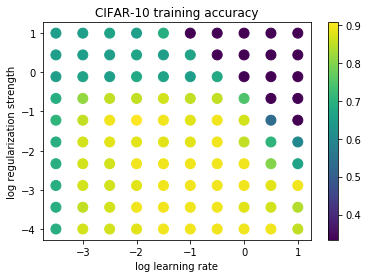

In [8]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x] for x in results]
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

plt.show()

In [15]:
best_softmax.W

array([[-0.0025947 , -0.00140103,  0.00072284],
       [-0.00326898,  0.00029669,  0.00251909],
       [-0.00210232,  0.00178517,  0.00064286]])

In [9]:
best_svm.W

array([[-0.64243845,  0.03786538,  0.60457873],
       [-0.82830895, -0.07153973,  0.89978807],
       [-0.20251612,  0.4564313 , -0.25393498]])

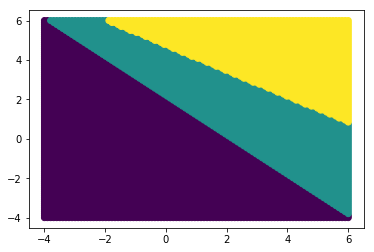

In [10]:
x_test = np.load('x_test.npy')
x_test_norm = x_test- x_train_mean
x_test_norm /= x_train_std
x_test_new = np.hstack([x_test_norm, np.ones((x_test.shape[0], 1))])
y_test_hat = np.argmax(np.dot(x_test_new,best_svm.W),axis=1)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_hat)

In [11]:
print(y_test_hat)

[0 0 0 ... 2 2 2]


In [12]:
np.save('t_test.npy',y_test_hat)